## Identifying Healthcare Professionals(HCP) and their specialization

***Mounting drive in order to use files stored on google drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Importing neccessary modules***

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # deluxe visualization library
import matplotlib.pyplot as plt # visualization library to support seaborn
%matplotlib inline
import string


***Providing the path for*** *complete_data file* ***file stored in drive***

In [ ]:
complete_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Doceree-HCP_Train.csv",encoding = "ISO-8859-1")
complete_data

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,114933,Desktop,2,68.82.97.126,051e4a06-4cb4-4b97-b0b1-d1c6a2b8e2c2,Philadelphia,19120.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/consultat...,Cardiovascular|Clinical|False|Male|Oncology|Ps...,207RP1001X,1.0
113933,114934,Desktop,2,104.172.11.109,3289bba5-4a50-4b61-a5cc-68596bbdc2bf,Van Nuys,914014213.0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Asthma|Arthritis|General|Clinical|Diagnosis|Rh...,2084P0800X,1.0
113934,114935,Desktop,7,174.21.94.113,9c36e90c-caa7-4323-8431-fb84f8293972,NaN,98105.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/39455-whats-th...,Rehabilitation|Transplantation|Clinical|Preven...,208000000X,1.0
113935,114936,Mobile,2,69.253.129.131,afc27760-31f7-4f6e-aa08-90d8a96525d0,Wilmington,19808.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.dermatologyadvisor.com/home/topics...,pain|disease|autoimmune|multiple sclerosis|gra...,2084P0800X,1.0


***Basic Data Analysis***


1. Info about the data(presence of any null values,checking data types of features)

In [ ]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  object 
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  object 
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         107578 non-null  object 
 6   USERZIPCODE      109345 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  object 
 9   CHANNELTYPE      113937 non-null  object 
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 12.2+ MB


In [ ]:
complete_data.dropna(subset=['IS_HCP'], inplace= True)

In [ ]:
complete_data['USERCITY']=complete_data['USERCITY'].fillna(complete_data['USERCITY'].mode().iloc[0])

In [ ]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113936 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113936 non-null  int64  
 1   DEVICETYPE       113936 non-null  object 
 2   PLATFORM_ID      113936 non-null  int64  
 3   BIDREQUESTIP     113936 non-null  object 
 4   USERPLATFORMUID  113932 non-null  object 
 5   USERCITY         113936 non-null  object 
 6   USERZIPCODE      109344 non-null  float64
 7   USERAGENT        113934 non-null  object 
 8   PLATFORMTYPE     113936 non-null  object 
 9   CHANNELTYPE      113936 non-null  object 
 10  URL              113936 non-null  object 
 11  KEYWORDS         113936 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 13.0+ MB


In [ ]:
def transform_message(message):
    message_not_punc = [] # Message without punctuation
    message_not_punc= message.split('|')

    # Join words again to form the string.
    message_not_punc = ' '.join(message_not_punc)
    return message_not_punc

In [ ]:
complete_data['KEYWORDS']=complete_data['KEYWORDS'].apply(transform_message)

In [ ]:
complete_data['KEYWORDS']

0         General Endocrine False Medicine Surgery Urolo...
1         Bone Marrow Radiography Chronic Oncology Psych...
2         General Endocrine False Medicine Surgery Urolo...
3         Dental Total Clinical Pharmacology Physicians ...
4         Critical Care Emergency Medicine General Pract...
                                ...                        
113932    Cardiovascular Clinical False Male Oncology Ps...
113933    Asthma Arthritis General Clinical Diagnosis Rh...
113934    Rehabilitation Transplantation Clinical Preven...
113935    pain disease autoimmune multiple sclerosis gra...
113936    Genetic Large Autoimmune Health False Abortion...
Name: KEYWORDS, Length: 113936, dtype: object

In [ ]:
list(complete_data.head())

['ID',
 'DEVICETYPE',
 'PLATFORM_ID',
 'BIDREQUESTIP',
 'USERPLATFORMUID',
 'USERCITY',
 'USERZIPCODE',
 'USERAGENT',
 'PLATFORMTYPE',
 'CHANNELTYPE',
 'URL',
 'KEYWORDS',
 'TAXONOMY',
 'IS_HCP']

In [ ]:
y=complete_data['IS_HCP']
complete_data.drop(['ID','USERPLATFORMUID','USERZIPCODE','CHANNELTYPE','URL','TAXONOMY','IS_HCP','USERAGENT'], axis=1, inplace= True)

In [ ]:
complete_data.drop(['PLATFORM_ID','BIDREQUESTIP'], axis=1, inplace= True)

In [ ]:
list(complete_data.head())

['DEVICETYPE', 'USERCITY', 'PLATFORMTYPE', 'KEYWORDS']

In [ ]:
complete_data['KEYWORDS']=complete_data['KEYWORDS'].astype("category")
complete_data["DEVICETYPE"]=complete_data["DEVICETYPE"].astype("category")
complete_data['USERCITY']=complete_data['USERCITY'].astype("category")
complete_data['PLATFORMTYPE']=complete_data['PLATFORMTYPE'].astype("category")

In [ ]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113936 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   DEVICETYPE    113936 non-null  category
 1   USERCITY      113936 non-null  category
 2   PLATFORMTYPE  113936 non-null  category
 3   KEYWORDS      113936 non-null  category
dtypes: category(4)
memory usage: 1.8 MB


2. Filtering dataset as per the requirement (i.e. taking required features into consideration)

3. Statistical Analysis of Numerical features

In [ ]:
#Preprocessing for XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report #plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight



# splitting complete data into " stratified" train and test split
X_train, X_test, y_train, y_test = train_test_split(complete_data, y,test_size=0.3, random_state=42, stratify=y)

**1. XGBoost model v1 (base run of model with default hyperparameters)**

In [ ]:
clf = xgb.XGBClassifier(tree_method="gpu_hist",enable_categorical=True,max_cat_to_onehot=1)
clf.fit(X_train,
            y_train,
            verbose=1, # set to 1 to see xgb training round intermediate results
           eval_set=[(X_train, y_train), (X_test, y_test)])




[0]	validation_0-logloss:0.46343	validation_1-logloss:0.46436
[1]	validation_0-logloss:0.33336	validation_1-logloss:0.33483
[2]	validation_0-logloss:0.25131	validation_1-logloss:0.25268
[3]	validation_0-logloss:0.19668	validation_1-logloss:0.19820
[4]	validation_0-logloss:0.15691	validation_1-logloss:0.15875
[5]	validation_0-logloss:0.12842	validation_1-logloss:0.13048
[6]	validation_0-logloss:0.10751	validation_1-logloss:0.10978
[7]	validation_0-logloss:0.09151	validation_1-logloss:0.09408
[8]	validation_0-logloss:0.07940	validation_1-logloss:0.08212
[9]	validation_0-logloss:0.06988	validation_1-logloss:0.07264
[10]	validation_0-logloss:0.06244	validation_1-logloss:0.06526
[11]	validation_0-logloss:0.05671	validation_1-logloss:0.05979
[12]	validation_0-logloss:0.05178	validation_1-logloss:0.05504
[13]	validation_0-logloss:0.04758	validation_1-logloss:0.05109
[14]	validation_0-logloss:0.04361	validation_1-logloss:0.04724
[15]	validation_0-logloss:0.04104	validation_1-logloss:0.04482
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=1, max_delta_step=None,
              max_depth=None, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, predictor=None,
              random_state=None, ...)

---**Evaluation Metrics and Plots**---

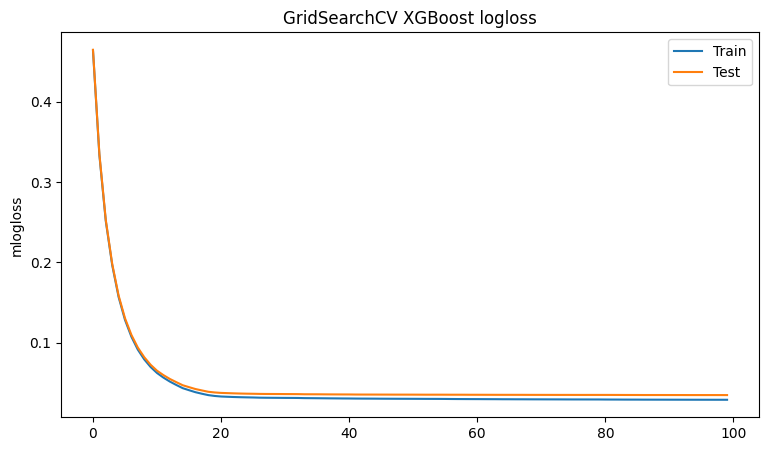

In [ ]:
# preparing evaluation metric plots
results = clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost logloss')
plt.show()


---**Model Classification Report**---

In [ ]:

y_pred = clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------')


------------------ Confusion Matrix -----------------

[[23676   251]
 [  193 10061]]

-------------------- Key Metrics --------------------

Accuracy: 0.99
Balanced Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.98
Macro Recall: 0.99
Macro F1-score: 0.98

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

--------------- Classification Report ---------------

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     23927
         1.0       0.98      0.98      0.98     10254

    accuracy                           0.99     34181
   macro avg       0.98      0.99      0.98     34181
weighted avg       0.99      0.99      0.99     34181

---------------------- XGBoost ----------------------


## **Model testing with given Test data**

In [ ]:
complete_test_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Doceree-HCP_Test.csv" ,encoding = "ISO-8859-1")
complete_test_data

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
0,115501,Desktop,2,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Desktop,2,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Desktop,7,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,Desktop,2,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...
...,...,...,...,...,...,...,...,...,...,...,...,...
28488,143989,Desktop,2,69.202.233.241,78ce4bbe-3885-4c14-b945-a0ea1e4574f4,Brooklyn,11215.0,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/news/...,Transplantation|Psychiatry|Heart Failure|Angio...
28489,143990,Desktop,7,75.4.190.65,a53799e1-b279-40cf-b467-11b4d659e325,Miami,33178.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cureus.com/publish/articles/144818...,small|hospitals|nephrology|emergency medicine|...
28490,143991,Desktop,7,137.52.180.45,acc732a8-2ee9-4e2c-9933-70e34db48101,Fort Lauderdale,33314.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/registrations/continue?...,small|hospitals|nephrology|emergency medicine|...
28491,143992,Desktop,8,66.249.66.4,dce21294-b105-4abb-b145-4e62d71def44,NaN,NaN,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,Online Medical Journal,Website,https://radrounds.com/radiology-case-images-te...,the|disease|pain|radiology|lung abscess|dyspar...


In [ ]:
complete_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28493 entries, 0 to 28492
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               28493 non-null  int64  
 1   DEVICETYPE       28493 non-null  object 
 2   PLATFORM_ID      28493 non-null  int64  
 3   BIDREQUESTIP     28493 non-null  object 
 4   USERPLATFORMUID  28493 non-null  object 
 5   USERCITY         26934 non-null  object 
 6   USERZIPCODE      27378 non-null  float64
 7   USERAGENT        28492 non-null  object 
 8   PLATFORMTYPE     28493 non-null  object 
 9   CHANNELTYPE      28493 non-null  object 
 10  URL              28493 non-null  object 
 11  KEYWORDS         28493 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.6+ MB


### Data preprocessing

In [ ]:
IDs=complete_test_data['ID']
complete_test_data['KEYWORDS']=complete_test_data['KEYWORDS'].apply(transform_message)
complete_test_data.drop(['ID','USERPLATFORMUID','USERZIPCODE','CHANNELTYPE','URL','USERAGENT','PLATFORM_ID','BIDREQUESTIP'], axis=1, inplace= True)

In [ ]:
complete_test_data['USERCITY']=complete_test_data['USERCITY'].fillna(complete_data['USERCITY'].mode().iloc[0])

In [ ]:
complete_test_data['KEYWORDS']=complete_test_data['KEYWORDS'].astype("category").cat.set_categories(X_train['KEYWORDS'].cat.categories)
complete_test_data["DEVICETYPE"]=complete_test_data["DEVICETYPE"].astype("category").cat.set_categories(X_train['DEVICETYPE'].cat.categories)
complete_test_data['USERCITY']=complete_test_data['USERCITY'].astype("category").cat.set_categories(X_train['USERCITY'].cat.categories)
complete_test_data['PLATFORMTYPE']=complete_test_data['PLATFORMTYPE'].astype("category").cat.set_categories(X_train['PLATFORMTYPE'].cat.categories)

### Prediction

In [ ]:
y_test_pred=clf.predict(complete_test_data)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
Output=pd.DataFrame(y_test_pred,columns=['IS_HCP'])

In [ ]:
Output.info

<bound method DataFrame.info of        IS_HCP
0           0
1           1
2           0
3           0
4           1
...       ...
28488       0
28489       0
28490       0
28491       0
28492       0

[28493 rows x 1 columns]>

In [ ]:
Output=pd.concat([IDs,Output],axis=1)

In [ ]:
Output

,ID,IS_HCP
0,115501,0
1,115502,1
2,115503,0
3,115504,0
4,115505,1
...,...,...
28488,143989,0
28489,143990,0
28490,143991,0
28491,143992,0


### Output file

In [ ]:
output_file='/content/drive/MyDrive/Colab Notebooks/data/Output.csv'
Output.to_csv(output_file,index=False)

# Model version_2 including TAXONOMY

### Loading data

In [ ]:
New_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Doceree-HCP_Train.csv",encoding = "ISO-8859-1")

### Data preprocessing

In [ ]:
New_data.dropna(subset=['TAXONOMY'], inplace= True)

In [ ]:
New_data['KEYWORDS']=New_data['KEYWORDS'].apply(transform_message)

In [ ]:
New_data['KEYWORDS']=New_data['KEYWORDS'].astype("category")
y=pd.get_dummies(New_data['TAXONOMY'])
columns_names=y.columns
columns_names

Index(['103T00000X', '103TC0700X', '1041C0700X', '106H00000X', '111N00000X',
       '122300000X', '1223P0221X', '146D00000X', '152W00000X', '163W00000X',
       ...
       '364S00000X', '364SF0001X', '364SP0807X', '364SP0808X', '364SP0809X',
       '367500000X', '367A00000X', '367H00000X', '376K00000X', '390200000X'],
      dtype='object', length=207)

In [ ]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32313 entries, 3 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               32313 non-null  int64   
 1   DEVICETYPE       32313 non-null  object  
 2   PLATFORM_ID      32313 non-null  int64   
 3   BIDREQUESTIP     32313 non-null  object  
 4   USERPLATFORMUID  32309 non-null  object  
 5   USERCITY         32313 non-null  object  
 6   USERZIPCODE      32313 non-null  float64 
 7   USERAGENT        32313 non-null  object  
 8   PLATFORMTYPE     32313 non-null  object  
 9   CHANNELTYPE      32313 non-null  object  
 10  URL              32313 non-null  object  
 11  KEYWORDS         32313 non-null  category
 12  TAXONOMY         32313 non-null  object  
 13  IS_HCP           32313 non-null  float64 
dtypes: category(1), float64(2), int64(2), object(9)
memory usage: 3.6+ MB


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(New_data['KEYWORDS'], y,test_size=0.3, random_state=42)

### Model intialization and training

In [ ]:
clf_v2 = xgb.XGBClassifier(tree_method="gpu_hist",enable_categorical=True,max_cat_to_onehot=1)
clf_v2.fit(X_train2,
            y_train2,
            verbose=1, # set to 1 to see xgb training round intermediate results
           eval_set=[(X_train2, y_train2), (X_test2, y_test2)])

[0]	validation_0-logloss:0.44162	validation_1-logloss:0.44164
[1]	validation_0-logloss:0.30282	validation_1-logloss:0.30287
[2]	validation_0-logloss:0.21555	validation_1-logloss:0.21563
[3]	validation_0-logloss:0.15734	validation_1-logloss:0.15743
[4]	validation_0-logloss:0.11718	validation_1-logloss:0.11729
[5]	validation_0-logloss:0.08894	validation_1-logloss:0.08906
[6]	validation_0-logloss:0.06880	validation_1-logloss:0.06894
[7]	validation_0-logloss:0.05429	validation_1-logloss:0.05447
[8]	validation_0-logloss:0.04381	validation_1-logloss:0.04401
[9]	validation_0-logloss:0.03617	validation_1-logloss:0.03640
[10]	validation_0-logloss:0.03063	validation_1-logloss:0.03089
[11]	validation_0-logloss:0.02658	validation_1-logloss:0.02687
[12]	validation_0-logloss:0.02362	validation_1-logloss:0.02395
[13]	validation_0-logloss:0.02146	validation_1-logloss:0.02183
[14]	validation_0-logloss:0.01988	validation_1-logloss:0.02029
[15]	validation_0-logloss:0.01873	validation_1-logloss:0.01918
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=1, max_delta_step=None,
              max_depth=None, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, predictor=None,
              random_state=None, ...)

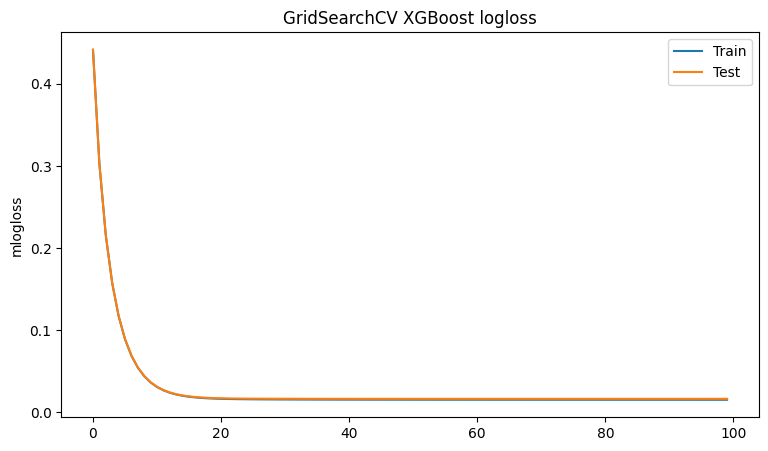

In [ ]:
# preparing evaluation metric plots
results = clf_v2.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# xgboost 'logloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('logloss')
plt.title('GridSearchCV XGBoost logloss')
plt.show()

### Prediction

In [ ]:
y_test_pred2=clf_v2.predict(complete_test_data['KEYWORDS'])
y_test_pred2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test_pred2=pd.DataFrame(data=y_test_pred2,columns=columns_names)

In [ ]:
output2=y_test_pred2.idxmax(1)

In [ ]:
output3=pd.DataFrame()
output3['TAXONOMY']=output2

In [ ]:
output3=pd.concat([Output,output3],axis=1)

### Output file

In [ ]:
output_file2='/content/drive/MyDrive/Colab Notebooks/data/Output_including_TAXONOMY.csv'
output3.to_csv(output_file2,index=False)